## Генерация случайных величин

Python (и все другое програмное обеспечение) генерирует случайные числа с помощью формул, так что они не на самом деле случайные, а, как говорят, псевдослучайные. Этот способ удобен для большинства приложений. Генерировать случайные числа мы будем с помощью numpy.

In [1]:
import numpy as np

### Seed

Для того, чтобы каждый раз при использовании генератора псевдослучайных чисел получать идентичные последовательности, используется функция set.seed (от set - задать, установить, и seed - начальное число). Как следует из названия, эта функция фиксирует число, служащее начальной точкой для запуска алгоритма генерации псевдослучайных чисел. В качестве аргумента функции указывают любое целое число (не важно, какое именно). 

* **np.random.seed(<число>)** —
настраивает генератор случайных чисел на новую последовательность. Если данная функция в программе не вызывается, по умолчанию используется системное время. 

In [3]:
np.random.seed(42) # Зафиксируем seed
print(np.random.rand()) # первое случайное число
print(np.random.rand()) # второе случайное число; оно будет отличаться от предыдущего

0.3745401188473625
0.9507143064099162


In [3]:
# Но если мы обновим seed, то наша случайная последовательность будет генерироваться <<сначала>>
np.random.seed(1) 
print(np.random.rand())
print(np.random.rand())

0.417022004702574
0.7203244934421581


### Равномерное распределение

* **np.random.rand($\,\mathbf{d_0, d_1, \ldots, d_n}$)**  — генерирует массив размера $d_0\times d_1 \times \ldots \times d_n$ из равномерно распределенных на [0,1] случайных величин.

In [4]:
np.random.rand() # просто одно число

0.7319939418114051

In [5]:
np.random.rand(10) # одномерный массив из 10 чисел

array([0.59865848, 0.15601864, 0.15599452, 0.05808361, 0.86617615,
       0.60111501, 0.70807258, 0.02058449, 0.96990985, 0.83244264])

In [6]:
np.random.rand(5,2) # двумерный массив размера [5,2]

array([[0.21233911, 0.18182497],
       [0.18340451, 0.30424224],
       [0.52475643, 0.43194502],
       [0.29122914, 0.61185289],
       [0.13949386, 0.29214465]])

Для генерации из равномерного распределения на произвольном интервале можно использовать функцию:   
* **np.random.uniform([low, high, size])** — герирует массив размера [size] из равномерного распределения на $[low,high]$.

П.С. Альтернативно можно сгенерировать равномерно распределенные на $[0,1]$ случайные величины и применить к ним линейное преобразование

In [7]:
np.random.uniform(5,10, size=[5,2])

array([[6.83180922, 7.28034992],
       [8.92587981, 5.99836891],
       [7.57117219, 7.96207284],
       [5.23225206, 8.03772426],
       [5.85262062, 5.32525796]])

Все следующие фукнции герерируют одномерный массив размера [size] из равномерно распределенных на [0,1] случайных величин. Но лучше пользоваться функциями **np.random.rand** или **np.random.uniform**, они чаще используются исследователями и программистами.

* **np.random.random_sample([size])**  
* **np.random.random([size])**  
* **np.random.ranf([size])**  
* **np.random.sample([size])**    

In [11]:
np.random.ranf(10)

array([0.26554666, 0.49157316, 0.05336255, 0.57411761, 0.14672857,
       0.58930554, 0.69975836, 0.10233443, 0.41405599, 0.69440016])

Следующие функции генерируют случайные числа из равномерного распределения на целых числах:  
* **np.random.randint(low[, high, size, dtype])** — здесь вернхнее значение не включается в диапазон.  
* **np.random.random_integers(low[, high, size])** — здесь вернхнее значение включается в диапазон (но эта функция устарела, лучше использовать предыдущую).  

In [8]:
np.random.randint(-1, 10, size = [2,10])

array([[ 2,  7,  0,  8,  7,  8,  3,  0,  2,  5],
       [ 6,  1, -1,  2,  0,  6,  2,  0,  4,  4]])

In [ ]:
np.random.random_integers(-1, 10, size= [2,10])

In [13]:
import matplotlib.pyplot as plt

20.085536923187668


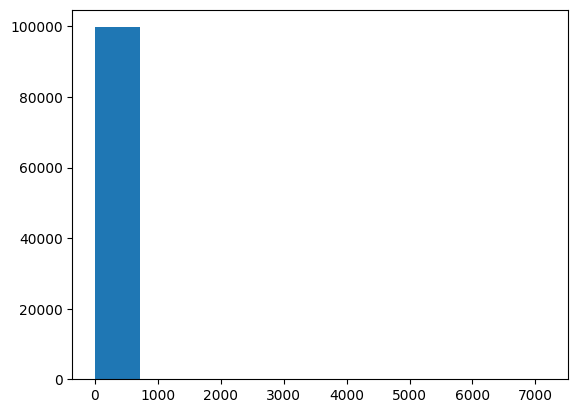

In [18]:
mu = 1
sigma = 2
print(np.exp(mu+sigma**2/2))


s = np.random.lognormal(mu,sigma,size =100000)
_ = plt.hist(s)

In [19]:
s.mean()

19.510803665383392

In [29]:
bootstrapped = (np.random
                .choice(s, size = (1000,100000), replace = True)
                .mean(axis = 1))

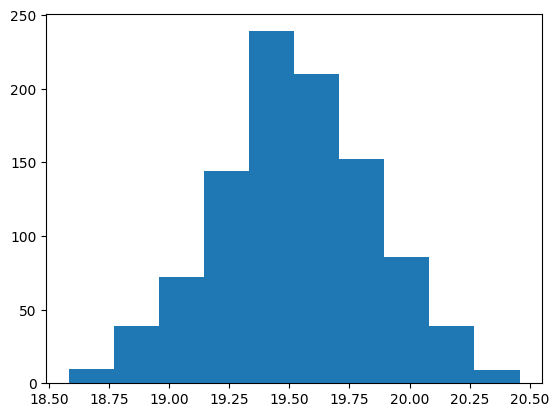

In [31]:
_ = plt.hist(bootstrapped)

In [36]:
np.quantile(bootstrapped, q = [0.025, 0.975])

array([18.88257674, 20.16218474])

In [68]:
x_n = np.random.normal(1,2, size = 10000)+np.random.exponential(10, size = 10000)

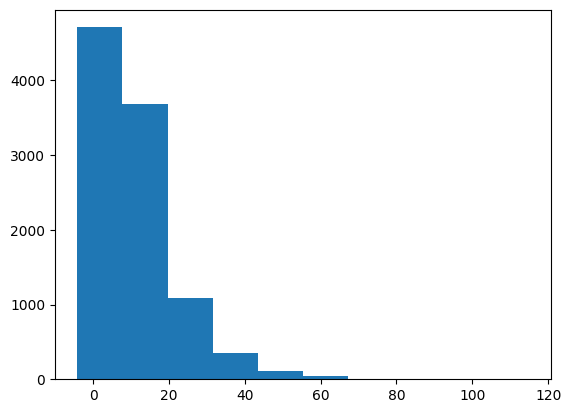

In [69]:
_ = plt.hist(x_n)

In [70]:
mu = x_n.mean()
std = x_n.std()

mu, std

(11.133224509771157, 10.326250480207062)

In [71]:
bootstrapped_2 = np.random.normal(mu, std, size = (1000,10000)).mean(axis = 1)

In [72]:
bootstrapped_3 = (np.random
                .choice(x_n, size = (1000,10000), replace = True)
                .mean(axis = 1))

In [73]:
print(np.quantile(bootstrapped_2, q = [0.025, 0.975]))

print(np.quantile(bootstrapped_3, q = [0.025, 0.975]))

[10.93102024 11.33556813]
[10.93837742 11.34853109]


### Случайные перестановки и случайный выбор

Везде далее в качестве **x** можно использовать различные объекты: строку, список, кортеж...

* **np.random.shuffle(x)** — случайная перестановка последовательности **x** (меняет сам **x**, ничего не возвращает).  
* **np.random.permutation(x)** — случайная перестановка последовательности **x** (не меняет **x**, возвращает перестановку).


In [10]:
# для np.random.permutation следующий код имеет смысл
a = np.arange(5)
b = np.random.permutation(a)
print(a)
print(b)

[0 1 2 3 4]
[0 2 3 4 1]


In [11]:
# для np.random.shuffle — нет, так как мы поменяем a, и ничего не присвоим b
a = np.arange(5)
b = np.random.shuffle(a) 
print(a)
print(b)

[0 4 2 1 3]
None


* **random.choince(x)** — возвращает случайный элемент из последовательности **x**.

In [ ]:
np.random.choice([1,2,3,7,0,88])

### Нормальное распределение

* **np.random.randn($\,\mathbf{d_0, d_1, \ldots, d_n}$)**  — генерирует массив размера $d_0\times d_1 \times \ldots \times d_n$ из стандартного нормального распределения $\mathcal{N}(0,1)$. 

In [13]:
np.random.randn() # генерируем одно число

0.5882941639193973

In [14]:
np.random.randn(2,3) # генерируем массив нужного размера

array([[ 0.34685933,  1.3670327 ,  0.67371607],
       [-1.2915627 , -0.84824392, -0.16659957]])

Следующая функция делает то же самое, но у нее немного другой синтаксис. Лучше пользоваться **np.random.randn**.   
* **np.random.standard_normal([size])** — генерирует массив размера [size] из стандартного нормального распределения $\mathcal{N}(0,1)$.



In [ ]:
np.random.standard_normal([2,5])

Для нормального распредления с произвольными параметрами можно использовать следующую функцию:   
* **np.random.normal([loc, scale, size])** — генерируют массив размера [size] из нормального распределения $\mathcal{N}\bigl(loc,(scale)^2\bigr)$.

In [16]:
np.random.normal(5,2, size = [5,2])

array([[4.57617415, 1.90655186],
       [7.09040125, 7.02075096],
       [5.14167329, 6.43517965],
       [4.49859018, 4.89694014],
       [5.02625781, 5.40447811]])

Чтобы сгенерировать многомерное нормальное распределение, можно воспользоваться следующей функцией:
* **np.random.multivariate_normal(mean, cov, [size])** — генерируют массив размера [size] из многомерного нормального распределения $\mathcal{N}(mean,cov)$.

In [ ]:
d = 5 
mean = np.ones(d)
cov = 5*np.eye(d)
np.random.multivariate_normal(mean, cov, size = 3) 

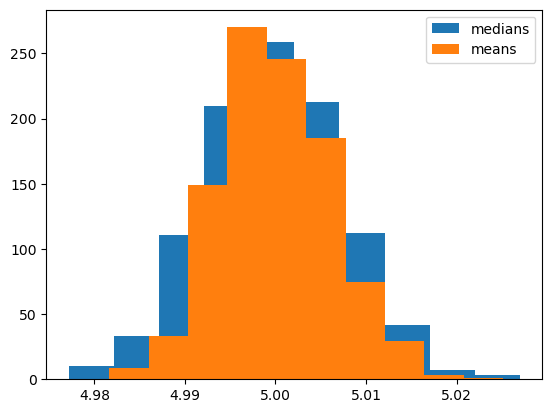

In [25]:
import matplotlib.pyplot as plt

x = np.random.normal(5,2, size = [1000,100000])
medians = np.median(x, axis = 1)
means = x.mean(axis = 1)

_ = plt.hist(medians, label = 'medians')
_ = plt.hist(means, label = 'means')
plt.legend()


In [42]:
x = np.random.normal(5,2, size = 1000)

In [49]:
def hl(x):
    hl_list = []
    for i in range(len(x)):
        for j in range(i, len(x)):
            hl_list.append((x[i]+x[j])/2)
    
    return np.median(hl_list)

In [50]:
from tqdm import tqdm
means = []
hls = []

for _ in tqdm(range(1000)):
    x = np.random.normal(5,2, size = 1000)
    means.append(x.mean())
    hls.append(hl(x))

100%|███████████████████████████████████████| 1000/1000 [01:29<00:00, 11.21it/s]


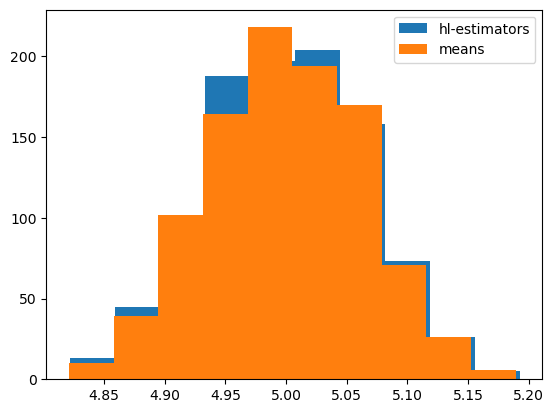

In [52]:
_ = plt.hist(hls, label = 'hl-estimators')
_ = plt.hist(means, label = 'means')
plt.legend()

### Другие распределения

В качестве примера приведем еще фукции для распределений, которые мы упоминали в курсе по теории вероятностей:
* **np.random.binomial(n, p[, size])** — биномиальное распределение  
* **np.random.exponential([scale, size])** — экспоненциальное распределение  
* **np.random.poisson([lam, size])** — распределение Пуассона  
* **np.random.standard_cauchy([size])** — распределение Коши  

Полный список распределений можно посмотреть на: https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html